In [79]:
"""
Python 3.10 Best models Spaceship_Titanic program will you survive on the spaceship titanic or not
File name Titanic_eda.py

Version: 0.1
Author: MLCV
Date: 2023-08-13
"""

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python

#load packages
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__))

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__))

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

#misc libraries
import random
import time


#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)



# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory


Python version: 3.11.3 (tags/v3.11.3:f3909b8, Apr  4 2023, 23:49:59) [MSC v.1934 64 bit (AMD64)]
pandas version: 2.2.0
matplotlib version: 3.8.2
NumPy version: 1.26.3
SciPy version: 1.12.0
IPython version: 8.20.0
scikit-learn version: 1.4.0
-------------------------


In [80]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

In [81]:
#import data from file: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html
'''
a dataset should be broken into 3 splits: train, test, and (final) validation
the test file provided is the validation file for competition submission
we will split the train set into train and test data in future sections
'''
data_raw = pd.read_csv(r'data/spaceship_titanic/train.csv')
data_val  = pd.read_csv(r'data/spaceship_titanic/test.csv')


# #to play with our data we'll create a copy
# #remember python assignment or equal passes by reference vs values, so we use the copy function: https://stackoverflow.com/questions/46327494/python-pandas-dataframe-copydeep-false-vs-copydeep-true-vs
data1 = data_raw.copy(deep = True)

# #however passing by reference is convenient, because we can clean both datasets at once
data_cleaner = [data1, data_val]

#preview data
print (data_raw.info()) #https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html
#data_raw.head() #https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html
#data_raw.tail() #https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.tail.html
data_raw.sample(10) #https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sample.html

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8435,9010_01,Mars,True,F/1846/P,55 Cancri e,32.0,False,0.0,0.0,0.0,0.0,0.0,Grog Pelte,True
3507,3769_01,Mars,False,E/251/S,TRAPPIST-1e,47.0,False,1037.0,0.0,258.0,4.0,0.0,Guar Stead,False
675,0705_01,Earth,False,F/149/P,55 Cancri e,43.0,False,0.0,0.0,722.0,0.0,0.0,Denny Mccarveymon,True
5318,5684_03,Europa,False,B/218/S,55 Cancri e,38.0,False,0.0,1198.0,48.0,278.0,1244.0,Genubik Busive,False
2045,2190_01,Earth,False,F/430/S,NaN,20.0,False,1750.0,0.0,446.0,0.0,76.0,Allia Barris,False
8660,9239_01,Mars,False,E/593/P,TRAPPIST-1e,14.0,False,2.0,0.0,918.0,128.0,0.0,Per Minen,False
7017,7462_01,Earth,True,G/1206/P,PSO J318.5-22,13.0,False,0.0,0.0,0.0,0.0,0.0,Hilia Mckinn,True
712,0753_02,Europa,False,A/4/P,55 Cancri e,65.0,False,19.0,1344.0,4.0,3190.0,8.0,NaN,False
7525,8049_01,Earth,False,G/1301/P,TRAPPIST-1e,22.0,False,6.0,21.0,0.0,782.0,0.0,Bonya Workmans,False
2441,2617_01,Earth,False,G/424/P,PSO J318.5-22,32.0,False,59.0,0.0,469.0,0.0,0.0,Yolas Peckerson,False


In [82]:
print(f'Duplicates in train set: {data_raw.duplicated().sum()}, ({np.round(100*data_raw.duplicated().sum()/len(data_raw),1)}%)')
print('')
print(f'Duplicates in test set: {data_val.duplicated().sum()}, ({np.round(100*data_val.duplicated().sum()/len(data_val),1)}%)')

Duplicates in train set: 0, (0.0%)

Duplicates in test set: 0, (0.0%)


In [83]:
print('Train columns with null values:\n', data1.isnull().sum())
print("-"*10)

print('Test/Validation columns with null values:\n', data_val.isnull().sum())
print("-"*10)

data_raw.describe(include = 'all')

Train columns with null values:
 PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64
----------
Test/Validation columns with null values:
 PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64
----------


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
count,8693,8492,8476,8494,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8493,8693
unique,8693,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Gollux Reedall,True
freq,1,4602,5439,8,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,2,4378
mean,NaN,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN,NaN


In [84]:
exp_feats=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Categorical features
cat_feats=['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

# Qualitative features
qual_feats=['PassengerId', 'Cabin' ,'Name']

Text(0.5, 1.0, 'Age group distribution')

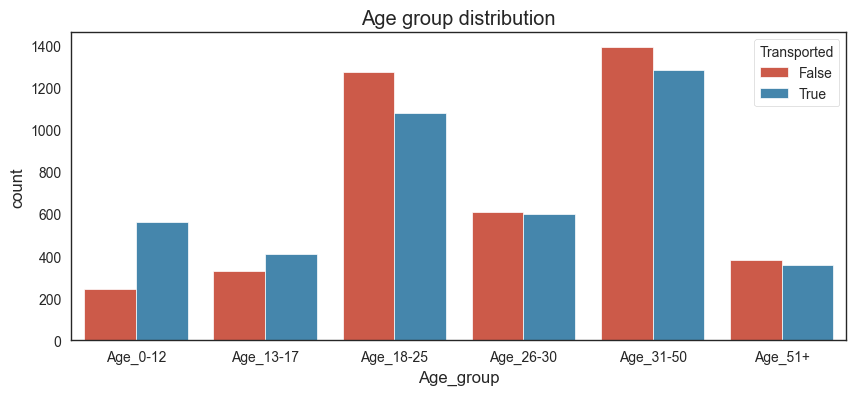

In [85]:
for dataset in data_cleaner:
    dataset['Age_group']=np.nan
    dataset.loc[dataset['Age']<=12,'Age_group']='Age_0-12'
    dataset.loc[(dataset['Age']>12) & (dataset['Age']<18),'Age_group']='Age_13-17'
    dataset.loc[(dataset['Age']>=18) & (dataset['Age']<=25),'Age_group']='Age_18-25'
    dataset.loc[(dataset['Age']>25) & (dataset['Age']<=30),'Age_group']='Age_26-30'
    dataset.loc[(dataset['Age']>30) & (dataset['Age']<=50),'Age_group']='Age_31-50'
    dataset.loc[dataset['Age']>50,'Age_group']='Age_51+'

# Plot distribution of new features
plt.figure(figsize=(10,4))
g=sns.countplot(data=data1, x='Age_group', hue='Transported', order=['Age_0-12','Age_13-17','Age_18-25','Age_26-30','Age_31-50','Age_51+'])
plt.title('Age group distribution')

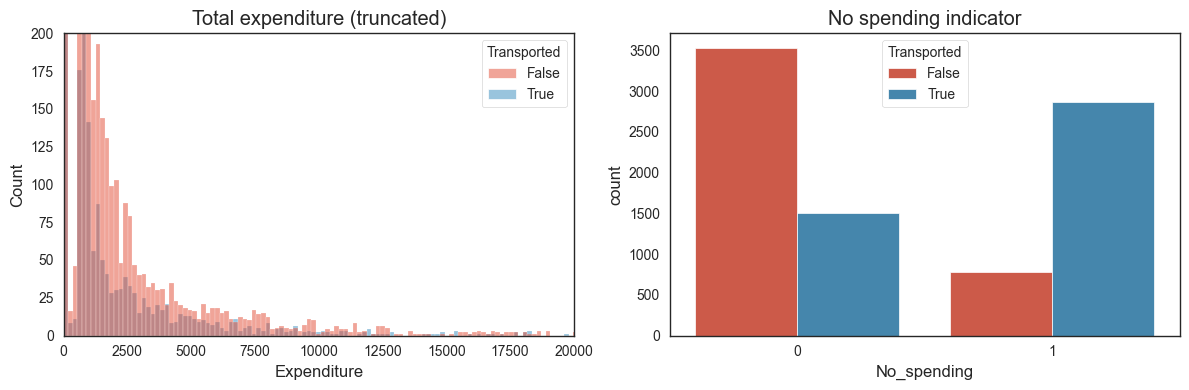

In [86]:
for dataset in data_cleaner:
    dataset['Expenditure']=dataset[exp_feats].sum(axis=1)
    dataset['No_spending']=(dataset['Expenditure']==0).astype(int)

# Plot distribution of new features
fig=plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(data=data1, x='Expenditure', hue='Transported', bins=200)
plt.title('Total expenditure (truncated)')
plt.ylim([0,200])
plt.xlim([0,20000])

plt.subplot(1,2,2)
sns.countplot(data=data1, x='No_spending', hue='Transported')
plt.title('No spending indicator')
fig.tight_layout()

In [87]:
for dataset in data_cleaner:
    dataset['Group'] = dataset['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)
    dataset['Group_size']=dataset['Group'].map(lambda x: dataset['Group'].value_counts()[x])

(0.0, 3000.0)

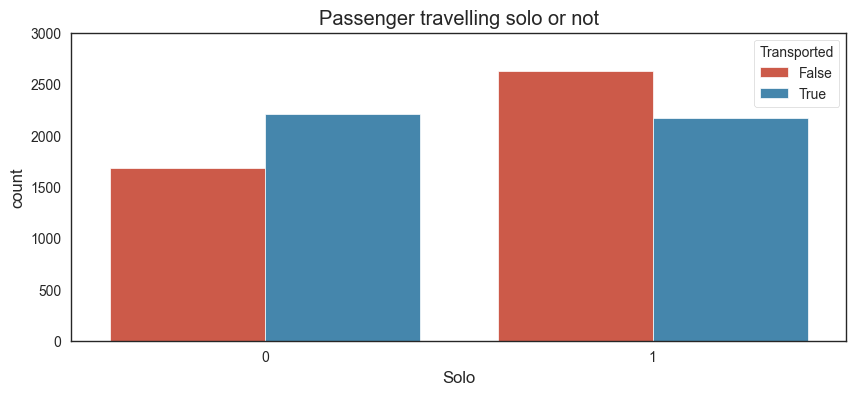

In [88]:
for dataset in data_cleaner:
    dataset['Solo']=(dataset['Group_size']==1).astype(int)


# New feature distribution
plt.figure(figsize=(10,4))
sns.countplot(data=data1, x='Solo', hue='Transported')
plt.title('Passenger travelling solo or not')
plt.ylim([0,3000])

In [89]:
for dataset in data_cleaner:
    # Replace NaN's with outliers for now (so we can split feature)
    dataset['Cabin'].fillna('Z/9999/Z', inplace=True)
    # New features
    dataset['Cabin_deck'] = dataset['Cabin'].apply(lambda x: x.split('/')[0])
    dataset['Cabin_number'] = dataset['Cabin'].apply(lambda x: x.split('/')[1]).astype(int)
    dataset['Cabin_side'] = dataset['Cabin'].apply(lambda x: x.split('/')[2])

    # Put Nan's back in (we will fill these later)
    dataset.loc[dataset['Cabin_deck']=='Z', 'Cabin_deck']=np.nan
    dataset.loc[dataset['Cabin_number']==9999, 'Cabin_number']=np.nan
    dataset.loc[dataset['Cabin_side']=='Z', 'Cabin_side']=np.nan

    # Drop Cabin (we don't need it anymore)
    dataset.drop('Cabin', axis=1, inplace=True)

In [90]:
for dataset in data_cleaner:
    # New features - training set
    dataset['Cabin_region1']=(dataset['Cabin_number']<300).astype(int)   # one-hot encoding
    dataset['Cabin_region2']=((dataset['Cabin_number']>=300) & (dataset['Cabin_number']<600)).astype(int)
    dataset['Cabin_region3']=((dataset['Cabin_number']>=600) & (dataset['Cabin_number']<900)).astype(int)
    dataset['Cabin_region4']=((dataset['Cabin_number']>=900) & (dataset['Cabin_number']<1200)).astype(int)
    dataset['Cabin_region5']=((dataset['Cabin_number']>=1200) & (dataset['Cabin_number']<1500)).astype(int)
    dataset['Cabin_region6']=((dataset['Cabin_number']>=1500) & (dataset['Cabin_number']<1800)).astype(int)
    dataset['Cabin_region7']=(dataset['Cabin_number']>=1800).astype(int)

In [91]:
for dataset in data_cleaner:
    # Calculate family size from last name.
    # Replace NaN's with outliers for now (so we can split feature)
    dataset['Name'].fillna('Unknown Unknown', inplace=True)
    # New feature - Surname
    dataset['Surname']=dataset['Name'].str.split().str[-1]
    # New feature - Family size
    dataset['Family_size']=dataset['Surname'].map(lambda x: dataset['Surname'].value_counts()[x])
    # Put Nan's back in (we will fill these later)
    dataset.loc[dataset['Surname']=='Unknown','Surname']=np.nan
    dataset.loc[dataset['Family_size']>100,'Family_size']=np.nan
    # Drop name (we don't need it anymore)
    dataset.drop('Name', axis=1, inplace=True)

In [92]:
data1['Transported'].astype(int)

for dataset in data_cleaner:
    # Columns with missing values
    na_cols=dataset.columns[dataset.isna().any()].tolist()
    mv=pd.DataFrame(dataset[na_cols].isna().sum(), columns=['Number_missing'])
    mv['Percentage_missing']=np.round(100*mv['Number_missing']/len(dataset),2)

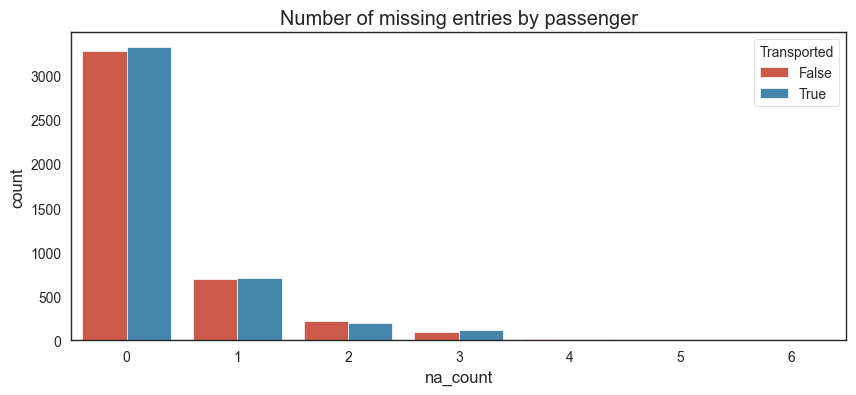

In [93]:
data1['na_count']=data1.isna().sum(axis=1)
plt.figure(figsize=(10,4))
sns.countplot(data=data1, x='na_count', hue='Transported')
plt.title('Number of missing entries by passenger')
data1.drop('na_count', axis=1, inplace=True)

In [94]:
for dataset in data_cleaner:
    GHP_gb=dataset.groupby(['Group','HomePlanet'])['HomePlanet'].size().unstack().fillna(0)
    # Missing values before
    HP_bef=dataset['HomePlanet'].isna().sum()

    # Passengers with missing HomePlanet and in a group with known HomePlanet
    GHP_index=dataset[dataset['HomePlanet'].isna()][(dataset[dataset['HomePlanet'].isna()]['Group']).isin(GHP_gb.index)].index

    # Fill corresponding missing values
    dataset.loc[GHP_index,'HomePlanet']=dataset.iloc[GHP_index,:]['Group'].map(lambda x: GHP_gb.idxmax(axis=1)[x])

    # Print number of missing values left
    print('#HomePlanet missing values before:',HP_bef)
    print('#HomePlanet missing values after:',dataset['HomePlanet'].isna().sum())

# We managed to fill 131 values with 100% confidence but we are not finished yet.

#HomePlanet missing values before: 201
#HomePlanet missing values after: 111
#HomePlanet missing values before: 87
#HomePlanet missing values after: 46


In [95]:
for dataset in data_cleaner:
    # Missing values before
    HP_bef=dataset['HomePlanet'].isna().sum()

    # Decks A, B, C or T came from Europa
    dataset.loc[(dataset['HomePlanet'].isna()) & (dataset['Cabin_deck'].isin(['A', 'B', 'C', 'T'])), 'HomePlanet']='Europa'

    # Deck G came from Earth
    dataset.loc[(dataset['HomePlanet'].isna()) & (dataset['Cabin_deck']=='G'), 'HomePlanet']='Earth'

    # Print number of missing values left
    print('#HomePlanet missing values before:',HP_bef)
    print('#HomePlanet missing values after:',dataset['HomePlanet'].isna().sum())

#HomePlanet missing values before: 111
#HomePlanet missing values after: 63
#HomePlanet missing values before: 46
#HomePlanet missing values after: 31


In [96]:
for data in data_cleaner:
    SHP_gb=data.groupby(['Surname','HomePlanet'])['HomePlanet'].size().unstack().fillna(0)
    #  Everyone with the same surname comes from the same home planet.
    # Missing values before
    HP_bef=data['HomePlanet'].isna().sum()

    # Passengers with missing HomePlanet and in a family with known HomePlanet
    SHP_index=data[data['HomePlanet'].isna()][(data[data['HomePlanet'].isna()]['Surname']).isin(SHP_gb.index)].index

    # Fill corresponding missing values
    data.loc[SHP_index,'HomePlanet']=data.iloc[SHP_index,:]['Surname'].map(lambda x: SHP_gb.idxmax(axis=1)[x])

    # Print number of missing values left
    print('#HomePlanet missing values before:',HP_bef)
    print('#HomePlanet missing values after:',data['HomePlanet'].isna().sum())

#HomePlanet missing values before: 63
#HomePlanet missing values after: 8
#HomePlanet missing values before: 31
#HomePlanet missing values after: 11


In [97]:
for data in data_cleaner:
    # Missing values before
    HP_bef=data['HomePlanet'].isna().sum()

    # Fill remaining HomePlanet missing values with Earth (if not on deck D) or Mars (if on Deck D)
    data.loc[(data['HomePlanet'].isna()) & ~(data['Cabin_deck']=='D'), 'HomePlanet']='Earth'
    data.loc[(data['HomePlanet'].isna()) & (data['Cabin_deck']=='D'), 'HomePlanet']='Mars'

    # Print number of missing values left
    print('#HomePlanet missing values before:',HP_bef)
    print('#HomePlanet missing values after:',data['HomePlanet'].isna().sum())

# We're done with HomePlanet.

#HomePlanet missing values before: 8
#HomePlanet missing values after: 0
#HomePlanet missing values before: 11
#HomePlanet missing values after: 0


In [98]:
for data in data_cleaner:
    # Missing values before
    D_bef=data['Destination'].isna().sum()

    # Fill missing Destination values with mode
    data.loc[(data['Destination'].isna()), 'Destination']='TRAPPIST-1e'

    # Print number of missing values left
    print('#Destination missing values before:',D_bef)
    print('#Destination missing values after:',data['Destination'].isna().sum())

#Destination missing values before: 182
#Destination missing values after: 0
#Destination missing values before: 92
#Destination missing values after: 0


In [99]:
for data in data_cleaner:
    # Joint distribution of Group and Surname
    GSN_gb=data[data['Group_size']>1].groupby(['Group','Surname'])['Surname'].size().unstack().fillna(0)

    # The majority (83%) of groups contain only 1 family. So let's fill missing surnames according to the majority surname in that group.
    # Missing values before
    SN_bef=data['Surname'].isna().sum()

    # Passengers with missing Surname and in a group with known majority Surname
    GSN_index=data[data['Surname'].isna()][(data[data['Surname'].isna()]['Group']).isin(GSN_gb.index)].index

    # Fill corresponding missing values
    data.loc[GSN_index,'Surname']=data.iloc[GSN_index,:]['Group'].map(lambda x: GSN_gb.idxmax(axis=1)[x])

    # Print number of missing values left
    print('#Surname missing values before:',SN_bef)
    print('#Surname missing values after:',data['Surname'].isna().sum())

    # Replace NaN's with outliers (so we can use map)
    data['Surname'].fillna('Unknown', inplace=True)

    # Update family size feature
    data['Family_size']=data['Surname'].map(lambda x: data['Surname'].value_counts()[x])

    # Put NaN's back in place of outliers
    data.loc[data['Surname']=='Unknown','Surname']=np.nan

    # Say unknown surname means no family
    data.loc[data['Family_size']>100,'Family_size']=0

#Surname missing values before: 200
#Surname missing values after: 104
#Surname missing values before: 94
#Surname missing values after: 51


In [100]:
for data in data_cleaner:
    # Joint distribution of Group and Cabin features
    GCD_gb=data[data['Group_size']>1].groupby(['Group','Cabin_deck'])['Cabin_deck'].size().unstack().fillna(0)
    GCN_gb=data[data['Group_size']>1].groupby(['Group','Cabin_number'])['Cabin_number'].size().unstack().fillna(0)
    GCS_gb=data[data['Group_size']>1].groupby(['Group','Cabin_side'])['Cabin_side'].size().unstack().fillna(0)

    # Everyone in the same group is also on the same cabin side. For cabin deck and cabin number there is also a fairly good (but not perfect) correlation with group.
    # Missing values before
    CS_bef=data['Cabin_side'].isna().sum()

    # Passengers with missing Cabin side and in a group with known Cabin side
    GCS_index=data[data['Cabin_side'].isna()][(data[data['Cabin_side'].isna()]['Group']).isin(GCS_gb.index)].index

    # Fill corresponding missing values
    data.loc[GCS_index,'Cabin_side']=data.iloc[GCS_index,:]['Group'].map(lambda x: GCS_gb.idxmax(axis=1)[x])

    # Print number of missing values left
    print('#Cabin_side missing values before:',CS_bef)
    print('#Cabin_side missing values after:',data['Cabin_side'].isna().sum())

#Cabin_side missing values before: 199
#Cabin_side missing values after: 99
#Cabin_side missing values before: 100
#Cabin_side missing values after: 63


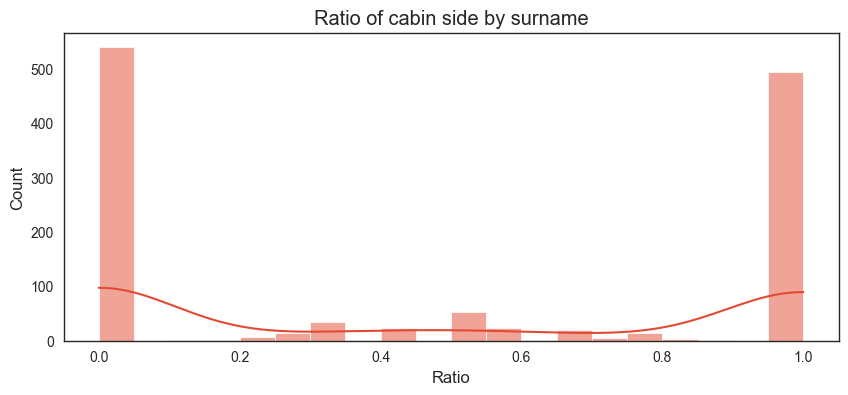

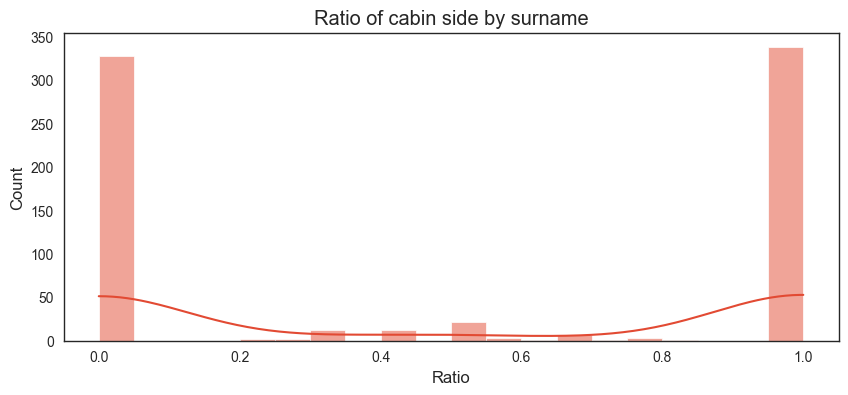

In [101]:
for data in data_cleaner:
    # Joint distribution of Surname and Cabin side
    SCS_gb=data[data['Group_size']>1].groupby(['Surname','Cabin_side'])['Cabin_side'].size().unstack().fillna(0)

    # Ratio of sides
    SCS_gb['Ratio']=SCS_gb['P']/(SCS_gb['P']+SCS_gb['S'])

    # Histogram of ratio
    plt.figure(figsize=(10,4))
    sns.histplot(SCS_gb['Ratio'], kde=True, binwidth=0.05)
    plt.title('Ratio of cabin side by surname')

In [102]:
# Print proportion
print('Percentage of families all on the same cabin side:', 100*np.round((SCS_gb['Ratio'].isin([0,1])).sum()/len(SCS_gb),3),'%')

# Another view of the same information
SCS_gb.head()

Percentage of families all on the same cabin side: 91.0 %


Cabin_side,P,S,Ratio
Surname,,,
Acobsond,3.0,0.0,1.0
Aginge,3.0,0.0,1.0
Aillyber,3.0,0.0,1.0
Aindlylid,0.0,1.0,0.0
Airdring,0.0,2.0,0.0


In [103]:
# Missing values before
CS_bef=data['Cabin_side'].isna().sum()

# Drop ratio column
SCS_gb.drop('Ratio', axis=1, inplace=True)

for data in data_cleaner:
    # Passengers with missing Cabin side and in a family with known Cabin side
    SCS_index=data[data['Cabin_side'].isna()][(data[data['Cabin_side'].isna()]['Surname']).isin(SCS_gb.index)].index

    # Fill corresponding missing values
    data.loc[SCS_index,'Cabin_side']=data.iloc[SCS_index,:]['Surname'].map(lambda x: SCS_gb.idxmax(axis=1)[x])

    # Drop surname (we don't need it anymore)
    data.drop('Surname', axis=1, inplace=True)

    # Print number of missing values left
    print('#Cabin_side missing values before:',CS_bef)
    print('#Cabin_side missing values after:',data['Cabin_side'].isna().sum())

#Cabin_side missing values before: 63
#Cabin_side missing values after: 74
#Cabin_side missing values before: 63
#Cabin_side missing values after: 45


In [104]:
for data in data_cleaner:
    # Value counts
    data['Cabin_side'].value_counts()

    # Missing values before
    CS_bef=data['Cabin_side'].isna().sum()

    # Fill remaining missing values with outlier
    data.loc[data['Cabin_side'].isna(),'Cabin_side']='Z'

    # Print number of missing values left
    print('#Cabin_side missing values before:',CS_bef)
    print('#Cabin_side missing values after:',data['Cabin_side'].isna().sum())

#Cabin_side missing values before: 74
#Cabin_side missing values after: 0
#Cabin_side missing values before: 45
#Cabin_side missing values after: 0


In [105]:
for data in data_cleaner:
    # Missing values before
    CD_bef=data['Cabin_deck'].isna().sum()

    # Passengers with missing Cabin deck and in a group with known majority Cabin deck
    GCD_index=data[data['Cabin_deck'].isna()][(data[data['Cabin_deck'].isna()]['Group']).isin(GCD_gb.index)].index

    # Fill corresponding missing values
    data.loc[GCD_index,'Cabin_deck']=data.iloc[GCD_index,:]['Group'].map(lambda x: GCD_gb.idxmax(axis=1)[x])

    # Print number of missing values left
    print('#Cabin_deck missing values before:',CD_bef)
    print('#Cabin_deck missing values after:',data['Cabin_deck'].isna().sum())

#Cabin_deck missing values before: 199
#Cabin_deck missing values after: 199
#Cabin_deck missing values before: 100
#Cabin_deck missing values after: 63


In [106]:
for data in data_cleaner:
    # Joint distribution
    data.groupby(['HomePlanet','Destination','Solo','Cabin_deck'])['Cabin_deck'].size().unstack().fillna(0)
    '''
    Passengers from Mars are most likely in deck F.
    Passengers from Europa are (more or less) most likely in deck C if travelling solo and deck B otherwise.
    Passengers from Earth are (more or less) most likely in deck G.
    We will fill in missing values according to where the mode appears in these subgroups.
    '''
    # Missing values before
    CD_bef=data['Cabin_deck'].isna().sum()

    # Fill missing values using the mode
    na_rows_CD=data.loc[data['Cabin_deck'].isna(),'Cabin_deck'].index
    data.loc[data['Cabin_deck'].isna(),'Cabin_deck']=data.groupby(['HomePlanet','Destination','Solo'])['Cabin_deck'].transform(lambda x: x.fillna(pd.Series.mode(x)[0]))[na_rows_CD]

    # Print number of missing values left
    print('#Cabin_deck missing values before:',CD_bef)
    print('#Cabin_deck missing values after:',data['Cabin_deck'].isna().sum())

#Cabin_deck missing values before: 199
#Cabin_deck missing values after: 0
#Cabin_deck missing values before: 63
#Cabin_deck missing values after: 0


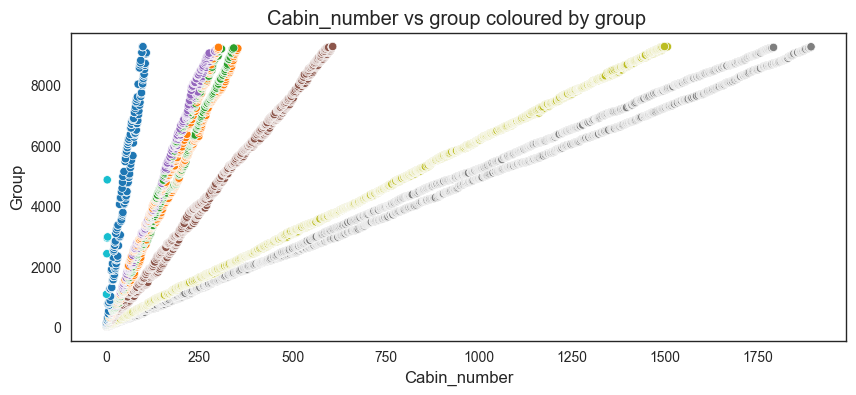

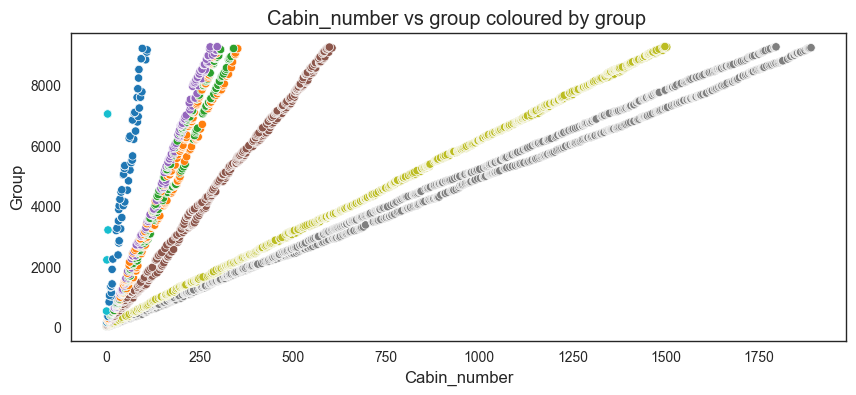

In [107]:
for data in data_cleaner:
    # Scatterplot
    plt.figure(figsize=(10,4))
    sns.scatterplot(x=data['Cabin_number'], y=data['Group'], c=LabelEncoder().fit_transform(data.loc[~data['Cabin_number'].isna(),'Cabin_deck']), cmap='tab10')
    plt.title('Cabin_number vs group coloured by group ')

In [108]:
for data in data_cleaner:
    # Missing values before
    CN_bef=data['Cabin_number'].isna().sum()
    print('#Cabin_number missing values before:',CN_bef)
    # Extrapolate linear relationship on a deck by deck basis
    for deck in ['A', 'B', 'C', 'D', 'E', 'F', 'G']:
        # Features and labels
        X_CN=data.loc[~(data['Cabin_number'].isna()) & (data['Cabin_deck']==deck),'Group']
        y_CN=data.loc[~(data['Cabin_number'].isna()) & (data['Cabin_deck']==deck),'Cabin_number']
        X_test_CN=data.loc[(data['Cabin_number'].isna()) & (data['Cabin_deck']==deck),'Group']

        if not X_test_CN.empty:
            # Linear regression
            model_CN=sklearn.linear_model.LinearRegression()
            model_CN.fit(X_CN.values.reshape(-1, 1), y_CN)
            preds_CN=model_CN.predict(X_test_CN.values.reshape(-1, 1))

            # Fill missing values with predictions
            data.loc[(data['Cabin_number'].isna()) & (data['Cabin_deck']==deck),'Cabin_number']=preds_CN.astype(int)

    # Print number of missing values left
    print('#Cabin_number missing values before:',CN_bef)
    print('#Cabin_number missing values after:',data['Cabin_number'].isna().sum())

    # One-hot encode cabin regions
    data['Cabin_region1']=(data['Cabin_number']<300).astype(int)
    data['Cabin_region2']=((data['Cabin_number']>=300) & (data['Cabin_number']<600)).astype(int)
    data['Cabin_region3']=((data['Cabin_number']>=600) & (data['Cabin_number']<900)).astype(int)
    data['Cabin_region4']=((data['Cabin_number']>=900) & (data['Cabin_number']<1200)).astype(int)
    data['Cabin_region5']=((data['Cabin_number']>=1200) & (data['Cabin_number']<1500)).astype(int)
    data['Cabin_region6']=((data['Cabin_number']>=1500) & (data['Cabin_number']<1800)).astype(int)
    data['Cabin_region7']=(data['Cabin_number']>=1800).astype(int)

#Cabin_number missing values before: 199
#Cabin_number missing values before: 199
#Cabin_number missing values after: 0
#Cabin_number missing values before: 100
#Cabin_number missing values before: 100
#Cabin_number missing values after: 0


In [109]:
for data in data_cleaner:
    # Missing values before
    V_bef=data['VIP'].isna().sum()

    # Fill missing values with mode
    data.loc[data['VIP'].isna(),'VIP']=False

    # Print number of missing values left
    print('#VIP missing values before:',V_bef)
    print('#VIP missing values after:',data['VIP'].isna().sum())

#VIP missing values before: 203
#VIP missing values after: 0
#VIP missing values before: 93
#VIP missing values after: 0


In [110]:
for data in data_cleaner:
    # Joint distribution
    data.groupby(['HomePlanet','No_spending','Solo','Cabin_deck'])['Age'].median().unstack().fillna(0)
    # Missing values before
    A_bef=data[exp_feats].isna().sum().sum()

    # Fill missing values using the median
    na_rows_A=data.loc[data['Age'].isna(),'Age'].index
    data.loc[data['Age'].isna(),'Age']=data.groupby(['HomePlanet','No_spending','Solo','Cabin_deck'])['Age'].transform(lambda x: x.fillna(x.median()))[na_rows_A]

    # Print number of missing values left
    print('#Age missing values before:',A_bef)
    print('#Age missing values after:',data['Age'].isna().sum())

#Age missing values before: 943
#Age missing values after: 0
#Age missing values before: 467
#Age missing values after: 0


In [111]:
for data in data_cleaner:
    # Update age group feature
    data.loc[data['Age']<=12,'Age_group']='Age_0-12'
    data.loc[(data['Age']>12) & (data['Age']<18),'Age_group']='Age_13-17'
    data.loc[(data['Age']>=18) & (data['Age']<=25),'Age_group']='Age_18-25'
    data.loc[(data['Age']>25) & (data['Age']<=30),'Age_group']='Age_26-30'
    data.loc[(data['Age']>30) & (data['Age']<=50),'Age_group']='Age_31-50'
    data.loc[data['Age']>50,'Age_group']='Age_51+'

In [112]:
for data in data_cleaner:
    # Joint distribution
    data.groupby(['No_spending','CryoSleep'])['CryoSleep'].size().unstack().fillna(0)
    # Missing values before
    CSL_bef=data['CryoSleep'].isna().sum()

    # Fill missing values using the mode
    na_rows_CSL=data.loc[data['CryoSleep'].isna(),'CryoSleep'].index
    data.loc[data['CryoSleep'].isna(),'CryoSleep']=data.groupby(['No_spending'])['CryoSleep'].transform(lambda x: x.fillna(pd.Series.mode(x)[0]))[na_rows_CSL]

    # Print number of missing values left
    print('#CryoSleep missing values before:',CSL_bef)
    print('#CryoSleep missing values after:',data['CryoSleep'].isna().sum())

#CryoSleep missing values before: 217
#CryoSleep missing values after: 0
#CryoSleep missing values before: 93
#CryoSleep missing values after: 0


In [113]:
for data in data_cleaner:
    # Missing values before
    E_bef=data[exp_feats].isna().sum().sum()

    # CryoSleep has no expenditure
    for col in exp_feats:
        data.loc[(data[col].isna()) & (data['CryoSleep']==True), col]=0

    # Print number of missing values left
    print('#Expenditure missing values before:',E_bef)
    print('#Expenditure missing values after:',data[exp_feats].isna().sum().sum())

#Expenditure missing values before: 943
#Expenditure missing values after: 571
#Expenditure missing values before: 467
#Expenditure missing values after: 295


In [114]:
for data in data_cleaner:
    # Joint distribution
    data.groupby(['HomePlanet','Solo','Age_group'])['Expenditure'].mean().unstack().fillna(0)
    # Missing values before
    E_bef=data[exp_feats].isna().sum().sum()

    # Fill remaining missing values using the median
    for col in exp_feats:
        na_rows=data.loc[data[col].isna(),col].index
        data.loc[data[col].isna(),col]=data.groupby(['HomePlanet','Solo','Age_group'])[col].transform(lambda x: x.fillna(x.mean()))[na_rows]

    # Print number of missing values left
    print('#Expenditure missing values before:',E_bef)
    print('#Expenditure missing values after:',data[exp_feats].isna().sum().sum())

#Expenditure missing values before: 571
#Expenditure missing values after: 0
#Expenditure missing values before: 295
#Expenditure missing values after: 0


In [115]:
for data in data_cleaner:
    # Update expenditure and no_spending
    data['Expenditure']=data[exp_feats].sum(axis=1)
    data['No_spending']=(data['Expenditure']==0).astype(int)
    data.isna().sum()
    # Apply log transform
    for col in ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Expenditure']:
        data[col]=np.log(1+data[col])

In [116]:
#CONVERT: convert objects to category using Label Encoder for train and test/validation dataset

#code categorical data
label = LabelEncoder()

for data in data_cleaner:

    data['HomePlanet_Code'] = label.fit_transform(data['HomePlanet'])
    data['CryoSleep_Code'] = label.fit_transform(data['CryoSleep'])
    data['Destination_Code'] = label.fit_transform(data['Destination'])
    data['VIP_Code'] = label.fit_transform(data['VIP'])
    data['Age_group_Code'] = label.fit_transform(data['Age_group'])
    data['Cabin_deck_Code'] = label.fit_transform(data['Cabin_deck'])
    data['Cabin_side_Code'] = label.fit_transform(data['Cabin_side'])

In [117]:
# define y variable aka target/outcome
Target = ['Transported']

# define x variables for original features aka feature selection

# 'HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'
data1_x = ['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'] # Original data
# 'HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported', 'Age_group', 'Expenditure', 'No_spending', 'Group', 'Group_size', 'Solo', 'Cabin_deck', 'Cabin_number', 'Cabin_side', 'Cabin_region1', 'Cabin_region2', 'Cabin_region3', 'Cabin_region4', 'Cabin_region5', 'Cabin_region6', 'Cabin_region7', 'Family_size', 'HomePlanet_Code', 'CryoSleep_Code', 'Destination_Code', 'VIP_Code', 'Age_group_Code', 'Cabin_deck_Code', 'Cabin_side_Code'

data1_x_calc = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Expenditure', 'No_spending', 'Group', 'Group_size', 'Solo', 'Cabin_number', 'Cabin_region1', 'Cabin_region2', 'Cabin_region3', 'Cabin_region4', 'Cabin_region5', 'Cabin_region6', 'Cabin_region7', 'Family_size', 'HomePlanet_Code', 'CryoSleep_Code', 'Destination_Code', 'VIP_Code', 'Age_group_Code', 'Cabin_deck_Code', 'Cabin_side_Code'] # coded for algorithm calculation
data1_xy =  Target + data1_x
print('Original X Y: ', data1_xy, '\n')


# define x variables for original w/bin features to remove continuous variables
data1_x_bin = ['Age', 'No_spending', 'Group_size', 'Solo', 'Cabin_region1', 'Cabin_region2', 'Cabin_region3', 'Cabin_region4', 'Cabin_region5', 'Cabin_region6', 'Cabin_region7', 'Family_size', 'HomePlanet_Code', 'CryoSleep_Code', 'Destination_Code', 'VIP_Code', 'Age_group_Code', 'Cabin_deck_Code', 'Cabin_side_Code']
data1_xy_bin = Target + data1_x_bin
print('Bin X Y: ', data1_xy_bin, '\n')


#define x and y variables for dummy features original
data1_dummy = pd.get_dummies(data1[data1_x])
data1_x_dummy = data1_dummy.columns.tolist()
data1_xy_dummy = Target + data1_x_dummy
print('Dummy X Y: ', data1_xy_dummy, '\n')



data1_dummy.head()

Original X Y:  ['Transported', 'HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'] 

Bin X Y:  ['Transported', 'Age', 'No_spending', 'Group_size', 'Solo', 'Cabin_region1', 'Cabin_region2', 'Cabin_region3', 'Cabin_region4', 'Cabin_region5', 'Cabin_region6', 'Cabin_region7', 'Family_size', 'HomePlanet_Code', 'CryoSleep_Code', 'Destination_Code', 'VIP_Code', 'Age_group_Code', 'Cabin_deck_Code', 'Cabin_side_Code'] 

Dummy X Y:  ['Transported', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars', 'CryoSleep_False', 'CryoSleep_True', 'Destination_55 Cancri e', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'VIP_False', 'VIP_True'] 



,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
0,39.0,0.000000,0.000000,0.000000,0.000000,0.000000,False,True,False,True,False,False,False,True,True,False
1,24.0,4.700480,2.302585,3.258097,6.309918,3.806662,True,False,False,True,False,False,False,True,True,False
2,58.0,3.784190,8.182280,0.000000,8.812248,3.912023,False,True,False,True,False,False,False,True,False,True
3,33.0,0.000000,7.157735,5.918894,8.110728,5.267858,False,True,False,True,False,False,False,True,True,False
4,16.0,5.717028,4.262680,5.023881,6.338594,1.098612,True,False,False,True,False,False,False,True,True,False


In [118]:
data_raw.describe(include = 'all')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
count,8693,8492,8476,8494,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8493,8693
unique,8693,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Gollux Reedall,True
freq,1,4602,5439,8,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,2,4378
mean,NaN,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN,NaN


In [119]:
#split train and test data with function defaults
#random_state -> seed or control random number generator: https://www.quora.com/What-is-seed-in-random-number-generation
train1_x, test1_x, train1_y, test1_y = model_selection.train_test_split(data1[data1_x_calc], data1[Target], random_state = 0)
train1_x_bin, test1_x_bin, train1_y_bin, test1_y_bin = model_selection.train_test_split(data1[data1_x_bin], data1[Target] , random_state = 0)
train1_x_dummy, test1_x_dummy, train1_y_dummy, test1_y_dummy = model_selection.train_test_split(data1_dummy[data1_x_dummy], data1[Target], random_state = 0)


print("Data1 Shape: {}".format(data1.shape))
print("Train1 Shape: {}".format(train1_x.shape))
print("Test1 Shape: {}".format(test1_x.shape))

train1_x_bin.head()

Data1 Shape: (8693, 36)
Train1 Shape: (6519, 27)
Test1 Shape: (2174, 27)


,Age,No_spending,Group_size,Solo,Cabin_region1,Cabin_region2,Cabin_region3,Cabin_region4,Cabin_region5,Cabin_region6,Cabin_region7,Family_size,HomePlanet_Code,CryoSleep_Code,Destination_Code,VIP_Code,Age_group_Code,Cabin_deck_Code,Cabin_side_Code
5020,37.0,1,1,1,0,0,0,1,0,0,0,4,2,1,2,0,4,5,0
5967,44.0,1,3,0,0,0,0,1,0,0,0,7,0,1,0,0,4,6,1
991,27.0,0,1,1,1,0,0,0,0,0,0,2,0,0,1,0,3,5,1
2894,15.0,0,1,1,0,1,0,0,0,0,0,6,0,0,0,0,1,6,0
2228,23.0,0,1,1,0,1,0,0,0,0,0,3,2,0,2,0,2,5,1


In [120]:
#Discrete Variable Correlation by Survival using
#group by aka pivot table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html
for x in data1_x:
    if data1[x].dtype != 'float64' :
        print('Transported Correlation by:', x)
        print(data1[[x, Target[0]]].groupby(x, as_index=False).mean())
        print('-'*10, '\n')

Transported Correlation by: HomePlanet
  HomePlanet  Transported
0      Earth     0.423420
1     Europa     0.660534
2       Mars     0.524100
---------- 

Transported Correlation by: CryoSleep
  CryoSleep  Transported
0     False     0.328176
1      True     0.814673
---------- 

Transported Correlation by: Destination
     Destination  Transported
0    55 Cancri e     0.610000
1  PSO J318.5-22     0.503769
2    TRAPPIST-1e     0.472199
---------- 

Transported Correlation by: VIP
     VIP  Transported
0  False     0.506475
1   True     0.381910
---------- 



ValueError: could not convert string to float: 'Europa'

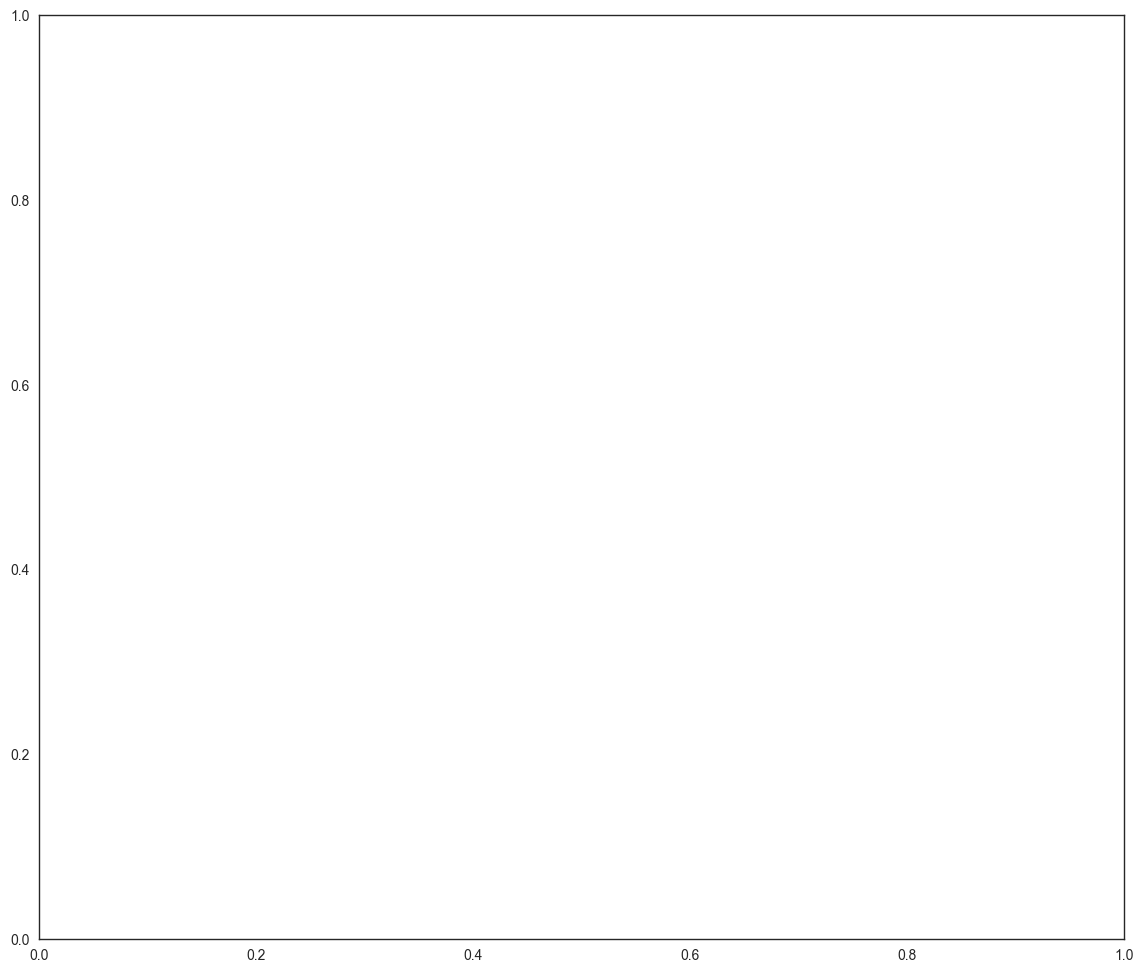

In [124]:
# correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)

    _ = sns.heatmap(
        df.corr(),
        cmap = colormap,
        square=True,
        cbar_kws={'shrink':.9 },
        ax=ax,
        annot=True,
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize': 5 }
    )

    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(data1)


In [125]:
#pair plots of entire dataset
pp = sns.pairplot(data1, hue = 'Transported', palette = 'deep', size=1.2, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=10) )
pp.set(xticklabels=[])

Error in callback <function flush_figures at 0x0000015493790FE0> (for post_execute), with arguments args (),kwargs {}:



KeyboardInterrupt



In [ ]:
#Machine Learning Algorithm (MLA) Selection and Initialization
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),

    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),

    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),

    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),

    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),

    #Trees
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),

    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),


    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBClassifier()
    ]

#split dataset in cross-validation with this splitter class: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit
#note: this is an alternative to train_test_split
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = data1[Target]

#index through MLA and save performance to table
row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())

    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(alg, data1[data1_x_bin], data1[Target], cv  = cv_split, return_train_score=True )

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!


    #save MLA predictions - see section 6 for usage
    alg.fit(data1[data1_x_bin], data1[Target])
    MLA_predict[MLA_name] = alg.predict(data1[data1_x_bin])

    row_index+=1

#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare